### Library Imports

In [1]:
from IPython.display import Image

## Building the Relational Database By Hand

*Thanks to FreeCodeCamp for their PostGreSQL course available [here](https://www.youtube.com/watch?v=qw--VYLpxG4) and Linuxhint for their tutorial [here](https://linuxhint.com/postgresql_installation_guide_ubuntu_20-04/)*.

In [2]:
!ls -a

.
..
.git
.gitignore
.ipynb_checkpoints
archive
data_dump
database.ini
database_example.ini
LICENSE
MLPy_v2.ipynb
pictures
README.ipynb
README.md


The database we will be using is the DerpiBooru database, which is available as a nightly PostGreSQL dump on their [API page](https://www.derpibooru.org/pages/data_dumps). Thanks to the team again!

### 2.1 How To Load The Derpibooru Database

*Mac OS was not used during this process.*

This were the commands used to mount the Derpibooru database after an install of PostgreSQL on Windows (Windows 10) and Linux (Ubuntu 20.04).

Windows                                 | Linux
:---                                    | :---
install PostgreSQL                      | sudo apt update
                                        | sudo apt -y upgrade
                                        | sudo apt install postgresql postgresql-client
                                        | sudo systemctl stop postgresql.service
                                        | sudo systemctl start postgresql.service
                                        | sudo systemctl enable postgresql.service
                                        | sudo systemctl status postgresql.service
                                        | sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'postgres';"
                                        | sudo su -l postgres
**enter psql shell**                    | psql -h localhost -p 5432 -U postgres derpibooru
Follow the instructions to the right -> | CREATE DATABASE derpibooru;
                                        | **exit to terminal**
                                        | pg_restore -O -h localhost -p 5432 -U postgres -d derpibooru <full_path_to_pgdump_file>
                                        | enter password for *postgres* profile
                                        | sudo su -l postgres
                                        | psql -h localhost -p 5432 -U postgres derpibooru
                                        | \c derpibooru

You should have a loaded data dump:

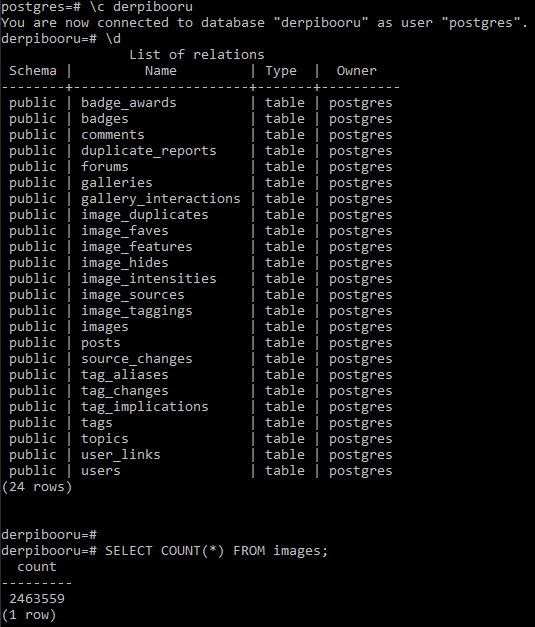

In [3]:
Image("pictures/derpibooru_db1.png") #as at 2020-10-13

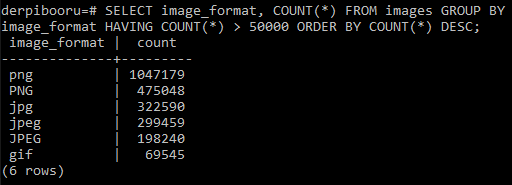

In [4]:
Image("pictures/derpibooru_db2.png") #as at 2020-10-13

### 2.2 Extract The Data We Want To Keep

We are interested in the following tables and their attributes:

Table          | Attributes
:---           | :---
images         | id, create_at, score, image_format, version_path
image_taggings | image_id, tag_id
tags           | id, name

Windows & Linux |
:--- |
CREATE DATABASE derpi_lite; |
SELECT id, created_at, score, image_format, version_path INTO new_images FROM images WHERE image_format IN ('png', 'PNG', 'jpg', 'JPEG', 'jpeg'); |
SELECT image_id, tag_id INTO new_image_taggings FROM image_taggings WHERE image_id IN (SELECT id FROM new_images); |
SELECT id, name INTO new_tags FROM tags WHERE id IN (SELECT tag_id FROM new_image_taggings); |
**exit to terminal** |
pg_dump -U postgres -t new_images derpibooru \| psql -p 5432 -U postgres -W derpi_lite |
pg_dump -U postgres -t new_image_taggings derpibooru \| psql -p 5432 -U postgres -W derpi_lite |
pg_dump -U postgres -t new_tags derpibooru \| psql -p 5432 -U postgres -W derpi_lite |
pg_dump -U postgres -Fc derpi_lite > *path_to_file.pgdump* |

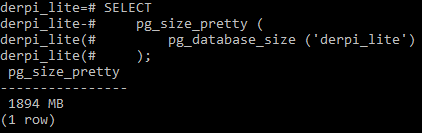

In [5]:
Image("pictures/derpibooru_db3.png") #as at 2020-10-13